# Mushroom Project

Getting Started

In [63]:
#Importing the python libraries and packages

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

# Importing the DataSet

In [64]:
#Reading the CSV file of the dataset
#Pandas read_csv() function imports a CSV file (in our case, ‘Mushrooms.csv’) to DataFrame format.

df = pd.read_csv("Mushrooms.csv")

In [65]:
#Examining the Data
#After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods.

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [66]:
#The .info() method will give you a concise summary of the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Observation : We have object type value or categorical value in all independent variables and class is our target variable 

In [68]:
#The shape of the dataset

df.shape

(8124, 23)

Observation : This shows that our dataset contains 8124 rows i.e. instances of mushrooms and 23 columns i.e. the specifications like cap-shape, cap-surface, cap-color, bruises, odor, gill-size, etc.

In [69]:
#Unique occurrences of ‘class’ column

df['class'].unique()

array(['p', 'e'], dtype=object)

Observation : As we can see, there are two unique values in the ‘class’ column of the dataset namely:
‘p’ -> poisonous and ‘e’ -> edible

In [70]:
#Count of the unique occurrences of ‘class’ column

df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Observation : As we can see, there are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.

# EDA(Exploratory Data Analysis)

In [71]:
#Visualizations
#Set Visualizations function and params

In [72]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [73]:
#Plot count value of columns function

def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=df, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

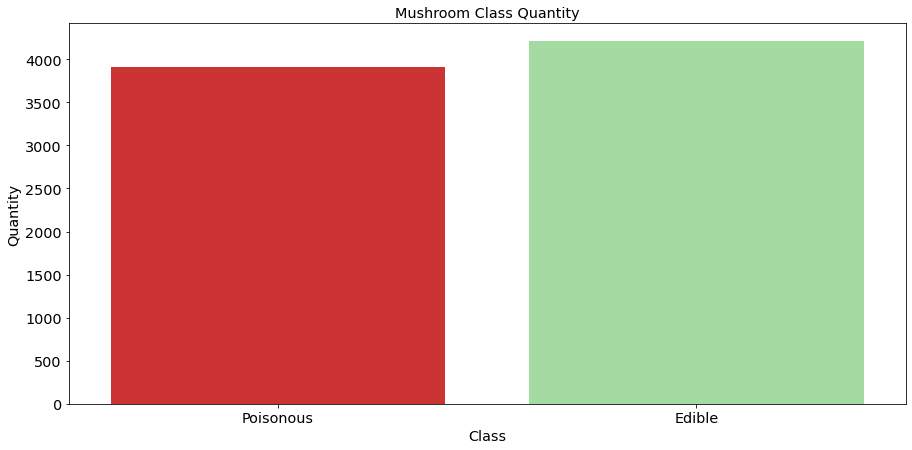

In [74]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

Observation: From the bar plot, we see that the dataset is balanced.

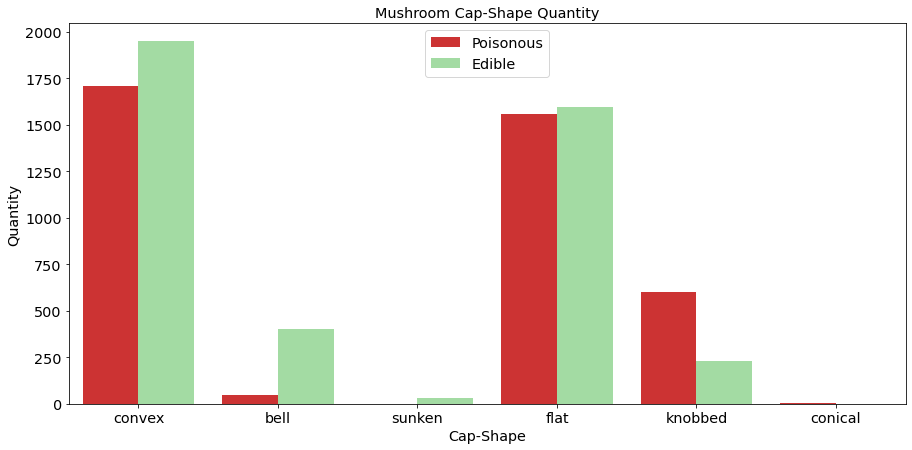

In [75]:
#Visualize the number of mushrooms for each cap categorize.

shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

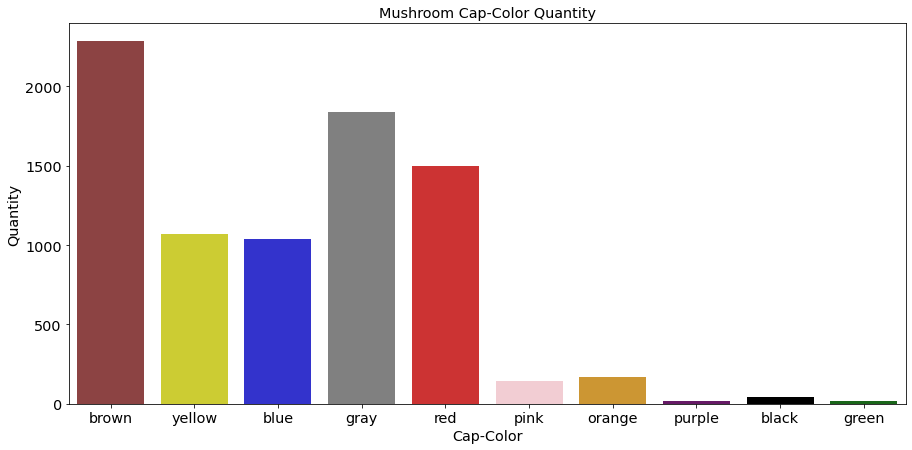

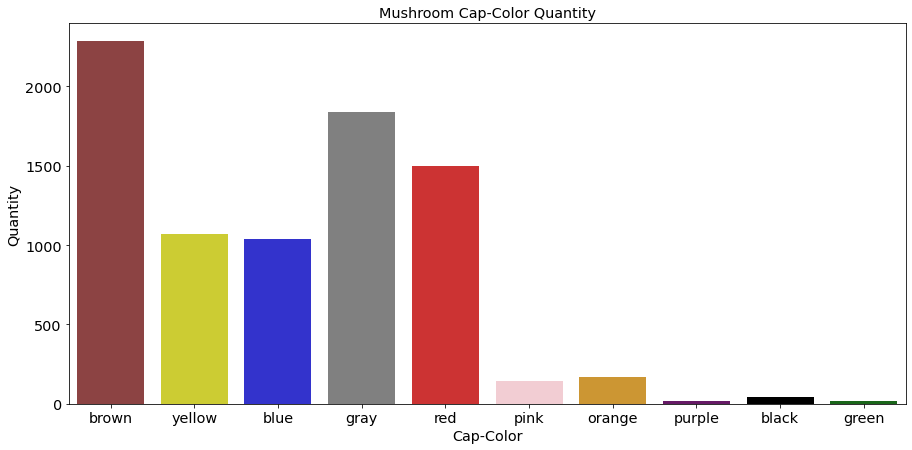

In [76]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

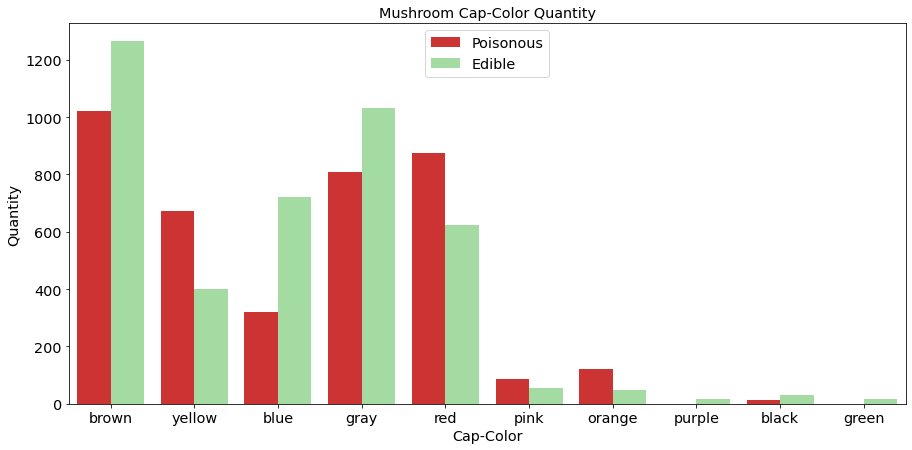

In [77]:
plot_col(col='cap-color', hue='class', labels=color_dict)

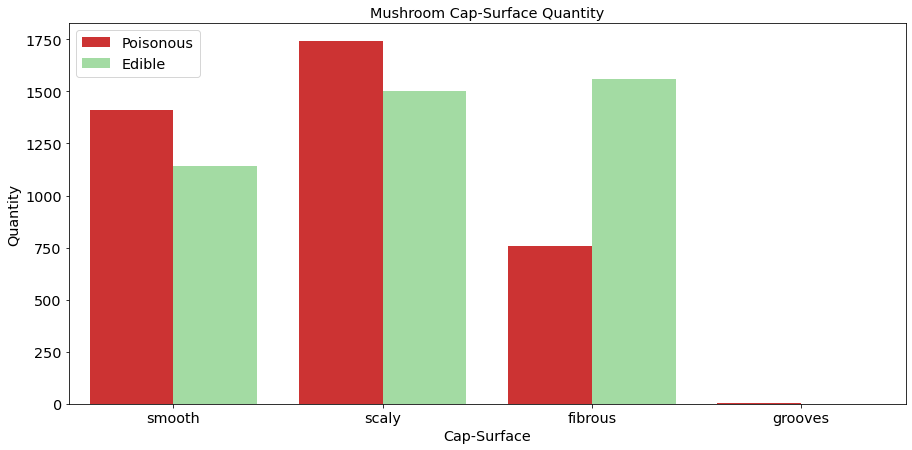

In [78]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

In [79]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

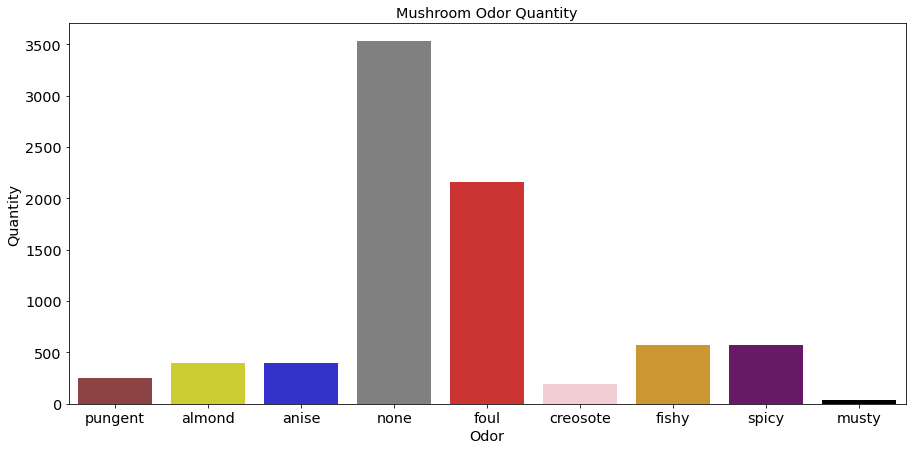

In [80]:
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
labels = get_labels(order, odor_dict)      
plot_col(col='odor', color=color_dict.keys(), labels=labels)

In [81]:
#Data Manipulation
#The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.

df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [82]:
#Label_Encoder

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [83]:
#Checking Correlation

cor = df.corr()

In [84]:
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


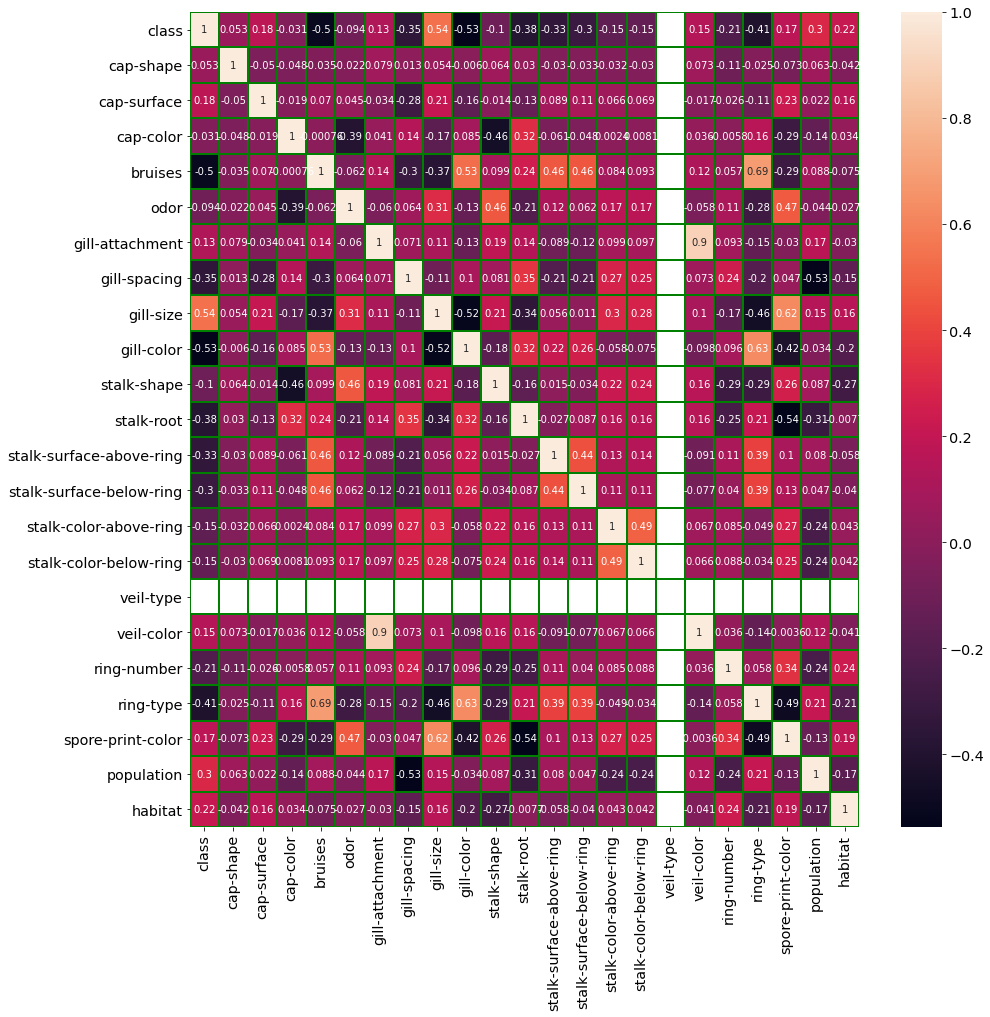

In [85]:
#Let’s look at the correlation between the variables

plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,linewidths=1,linecolor='green')
plt.yticks(rotation=0);

Observation : We cannot see any statistical data or any correlation in the "veil-type" column. This is because this attribute has a single value for all records. This means that it is a useless column for us. In the future we will drop this column from dataset.

In [86]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Observation : Now we see that all the column values are converted to ordinal and there are no categorical values left!


In [87]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


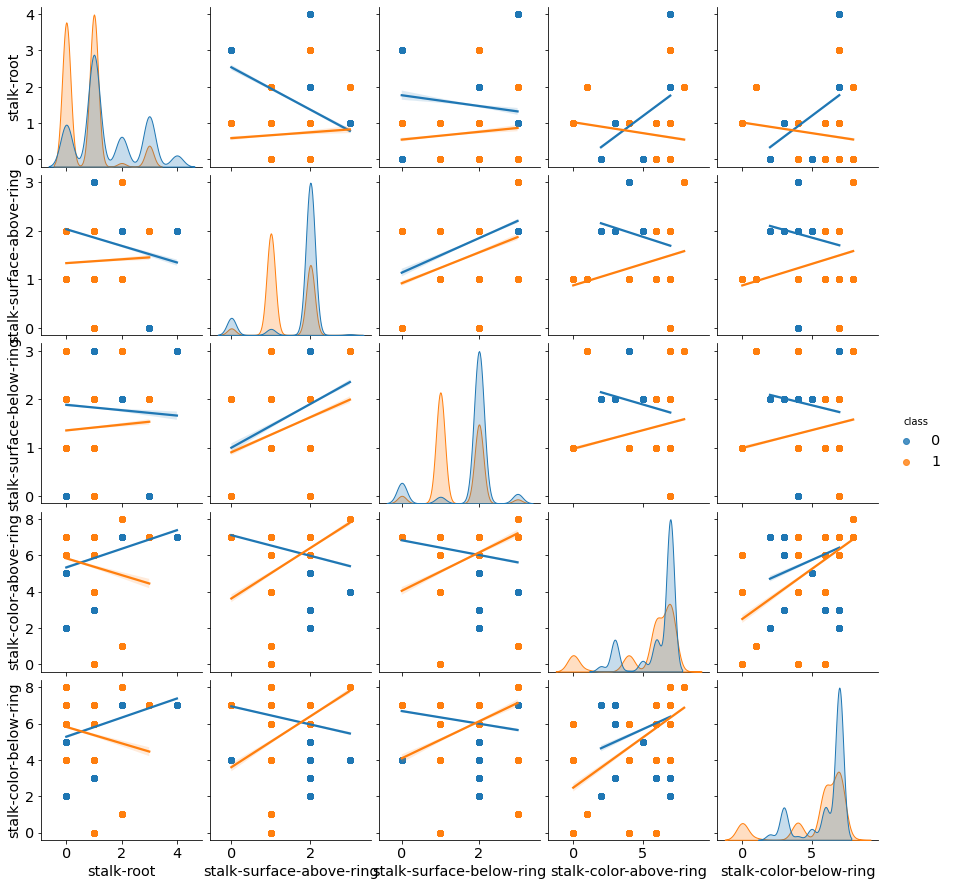

In [88]:
#Plot pairwise relationships in a mushrooms for each stalk categorize.

stalk_cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
              'stalk-color-above-ring', 'stalk-color-below-ring']
data_cats = df[stalk_cats]
sns.pairplot(data_cats, hue='class', kind='reg')

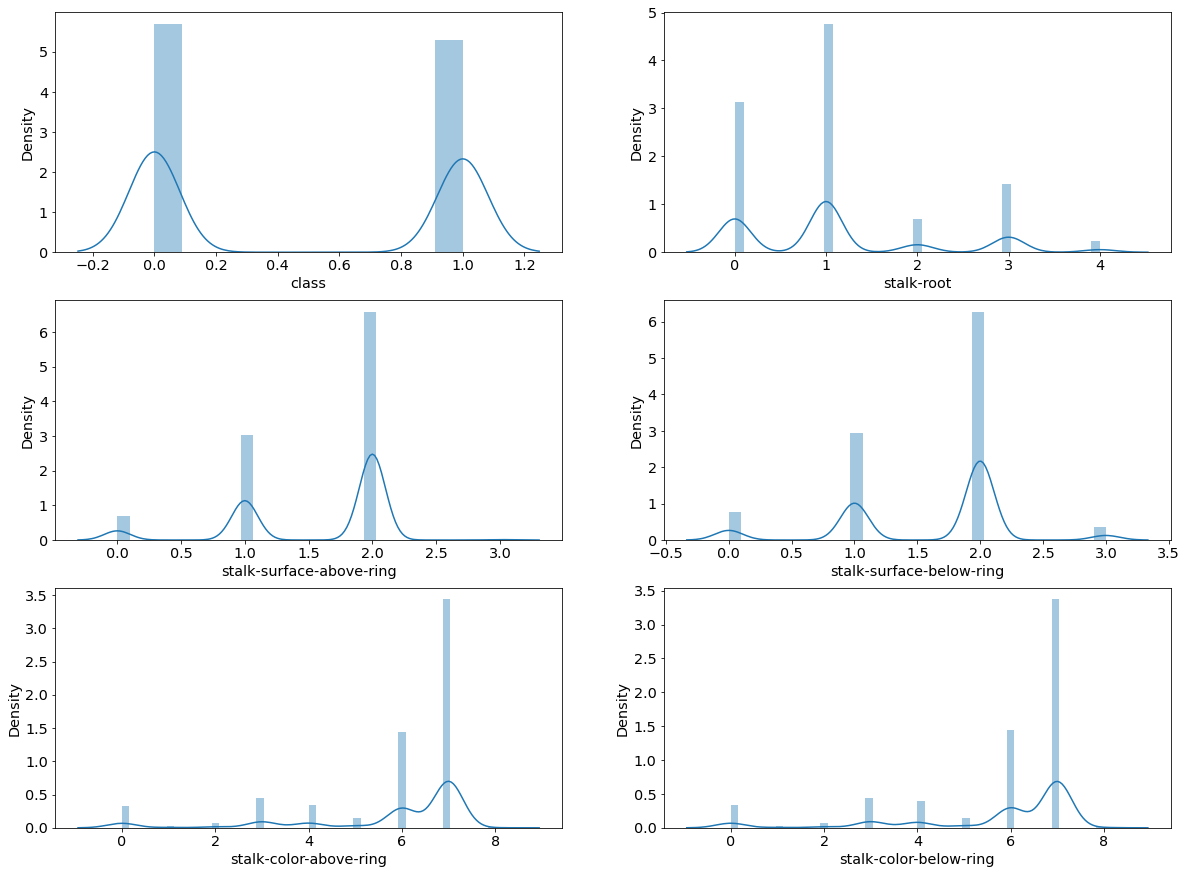

In [89]:
#Visualize the distribution in a mushrooms for each stalk categorize.

fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, axis in enumerate(ax.flat):
    sns.distplot(data_cats.iloc[:, i], ax=axis)

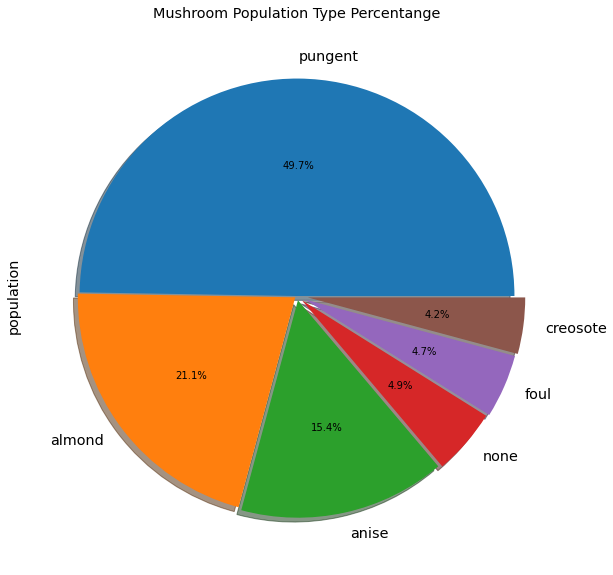

In [91]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(df['population'].value_counts().index)
pop_labels = get_labels(order, pop_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05)
df['population'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=labels, shadow=True, ax=ax)
ax.set_title('Mushroom Population Type Percentange');

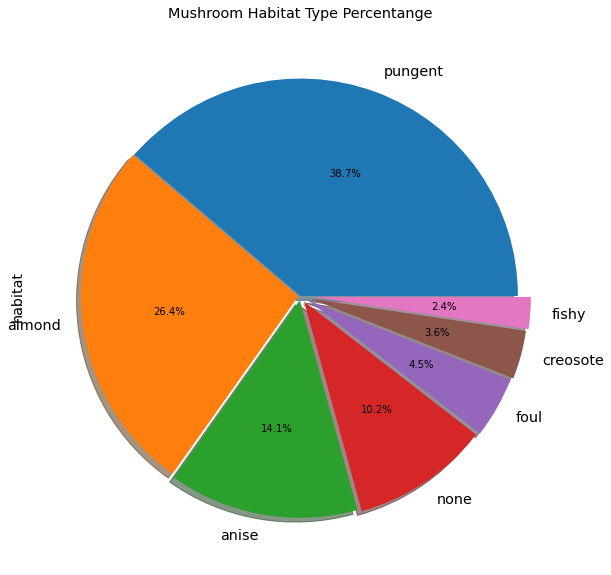

In [92]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(df['habitat'].value_counts().index)
hab_labels = get_labels(order, hab_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05, 0.06)
df['habitat'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', labels=labels, shadow=True, ax=ax)
ax.set_title('Mushroom Habitat Type Percentange');

# Drop Irrelevant Columns

In [93]:
#We'll delete columns from dataset, which doesn't mean much to us here. In this section and later sections, we will go through "encoded_data" which has Label Encoding process and fit to the models accordingly. Now, delete the "cap-shape" and "veil-type" columns that don't have much to do with other attributes from the dataset:

df.drop(["cap-shape", "veil-type"], axis=1, inplace=True)  # Drop "cap-shape" and "veil-type" columns from dataset
df.columns

Index(['class', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Data Cleaning

1.Checking Missing Values

In [94]:
df.isnull().sum()

class                       0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Observation : There are no missing values in any of the columns in the Dataset

2.Checking for Outliers

In [95]:
from scipy.stats import zscore

z=np.abs(zscore(df))


new_df=df [(z<3).all(axis=1)]

In [96]:
new_df.shape

(6568, 21)

In [97]:
df.shape

(8124, 21)

In [98]:
df.shape[0]-new_df.shape[0]

1556

#Observation : After checking for outliers , we see that we are loosing a lot of data . Hence no need to delete outliers afterwards . So we will continue with df.

3.Checking for Skewness

In [99]:
df.skew()

class                       0.071946
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Observation : As all column attributes are of non-numerical dtypes , hence skewness doesnt matter . so we should proceed furtherwards without removing skewed data. 

# Split Data and Target

In [100]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the class of the mushroom, we will drop the ‘class’ column.
from sklearn.model_selection import train_test_split

X = new_df.drop(['class'], axis=1)
y = new_df["class"]

Observation : Split Data and Target .Here we separate the data and target parts of the dataset and assign them to variables:

# Scaling of Data
Here we need to standardize them so that we can use the data properly. To do this, we need to apply the Scaling process to the data. Scikit-Learn's "StandardScaler" class can be used for this process:

In [101]:
from sklearn.preprocessing import StandardScaler  # Import StandartScaler class
std_scaler = StandardScaler()  # Create instance for scaler

X = std_scaler.fit_transform(X)  # Fit and transform data with scaler

# Preparation of Test and Train Data
The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:



In [102]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

# Classification Methods

1. Decision Tree Classification

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
#Predicting and estimating the result

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", DecisionTreeClassifier(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

 DecisionTreeClassifier(criterion=2503    0
6247    1
5156    1
2802    0
1919    0
       ..
5971    1
6845    1
4096    0
6857    1
6048    1
Name: class, Length: 1314, dtype: int32,
                       splitter=array([0, 1, 1, ..., 0, 1, 1]))
Test Accuracy: 100.0%


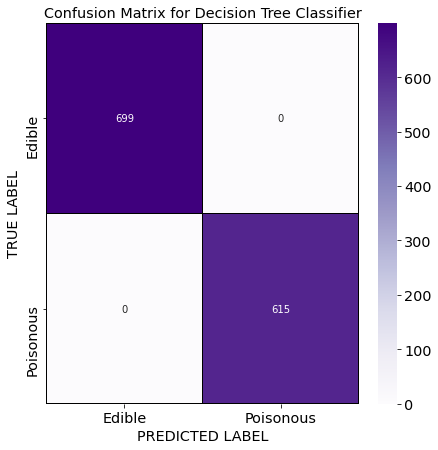

In [105]:
#Confusion Matrix for Decision Tree Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

2. Logistic Regression Classification

In [106]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 95.13%


In [107]:
#Classification report of Logistic Regression Classifier

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", LogisticRegression(y_test, y_pred_lr))

Logistic Regression Classifier report: 

 LogisticRegression(dual=array([0, 1, 1, ..., 0, 1, 1]),
                   penalty=2503    0
6247    1
5156    1
2802    0
1919    0
       ..
5971    1
6845    1
4096    0
6857    1
6048    1
Name: class, Length: 1314, dtype: int32)


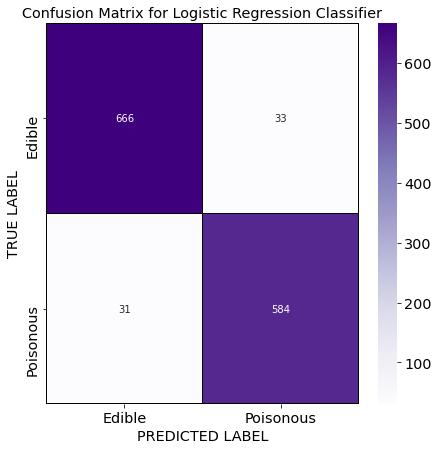

In [108]:
#Confusion Matrix for Logistic Regression Classifier

cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

3.SVM Classification

In [109]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [110]:
#Classification report of SVM Classifier

y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", SVC(y_test, y_pred_svm))

SVM Classifier report: 

 SVC(C=2503    0
6247    1
5156    1
2802    0
1919    0
       ..
5971    1
6845    1
4096    0
6857    1
6048    1
Name: class, Length: 1314, dtype: int32,
    kernel=array([0, 1, 1, ..., 0, 1, 1]))


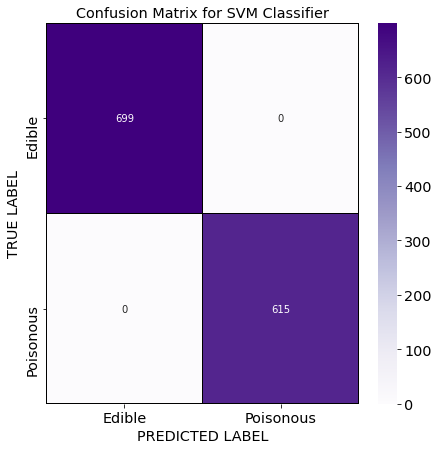

In [111]:
#Confusion Matrix for SVM Classifier

cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

4.Naive Bayes Classification

In [112]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 87.37%


In [114]:
#Classification report of Naive Bayes Classifier

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", GaussianNB(y_test, y_pred_nb))

Naive Bayes Classifier report: 

 GaussianNB(priors=2503    0
6247    1
5156    1
2802    0
1919    0
       ..
5971    1
6845    1
4096    0
6857    1
6048    1
Name: class, Length: 1314, dtype: int32,
           var_smoothing=array([0, 1, 0, ..., 0, 1, 1]))


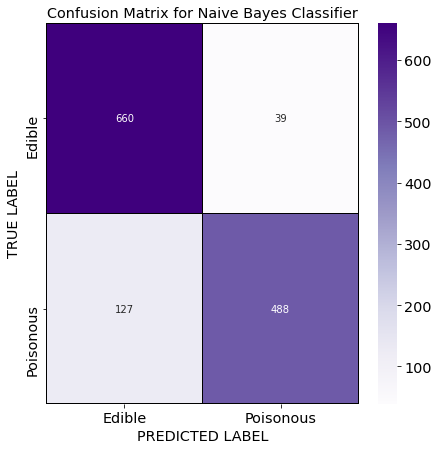

In [115]:
#Confusion Matrix for Naive Bayes Classifier

cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

5. Random Forest Classification

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [117]:
#Classification report of Random Forest Classifier

y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", RandomForestClassifier(y_test, y_pred_rf))

Random Forest Classifier report: 

 RandomForestClassifier(criterion=array([0, 1, 1, ..., 0, 1, 1]),
                       n_estimators=2503    0
6247    1
5156    1
2802    0
1919    0
       ..
5971    1
6845    1
4096    0
6857    1
6048    1
Name: class, Length: 1314, dtype: int32)


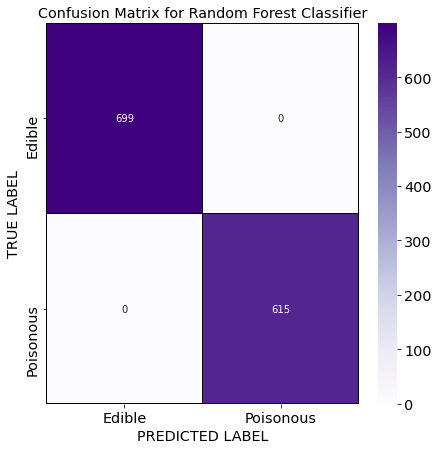

In [118]:
#Confusion matrix for Random Forest Classifier

cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# Computing Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
print(cross_val_score(dt,X,y,cv=5).mean())

0.9677223781387623


In [121]:
print(cross_val_score(lr,X,y,cv=5).mean())

0.9244955897064943


In [122]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.9483934800223963


In [123]:
print(cross_val_score(svm,X,y,cv=5).mean())

0.9464120068487354


In [124]:
print(cross_val_score(rf,X,y,cv=5).mean())

0.9464120068487354


In [125]:
print(cross_val_score(nb,X,y,cv=5).mean())

0.8360619307452346


# Hyper parameter tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
parameter={'max_depth':np.arange(2,10),
            'criterion':['gini','entropy']}

In [128]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [129]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [130]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [131]:
Final_mod = DecisionTreeClassifier(criterion='entropy',max_depth=4)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

95.96651445966515


# Predictions

In [132]:
#Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

preds = dt.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1]
[0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1]


Observation :
As we can see, the predicted and the true values match 100%.
    
From the confusion matrix, we saw that our train and test data is balanced.

Most of the classification methods hit 100% accuracy with this dataset.

# Saving the model

In [133]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']